<h1><font color='blue'> 8E and 8F: Finding the Probability P(Y==1|X)</font></h1>

<h2><font color='Geen'> 8E: Implementing Decision Function of SVM RBF Kernel</font></h2>

<font face=' Comic Sans MS' size=3>After we train a kernel SVM model, we will be getting support vectors and their corresponsing coefficients $\alpha_{i}$

Check the documentation for better understanding of these attributes: 

https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html
<img src='https://i.imgur.com/K11msU4.png' width=500>

As a part of this assignment you will be implementing the ```decision_function()``` of kernel SVM, here decision_function() means based on the value return by ```decision_function()``` model will classify the data point either as positive or negative

Ex 1: In logistic regression After traning the models with the optimal weights $w$ we get, we will find the value $\frac{1}{1+\exp(-(wx+b))}$, if this value comes out to be < 0.5 we will mark it as negative class, else its positive class

Ex 2: In Linear SVM After traning the models with the optimal weights $w$ we get, we will find the value of $sign(wx+b)$, if this value comes out to be -ve we will mark it as negative class, else its positive class.

Similarly in Kernel SVM After traning the models with the coefficients $\alpha_{i}$ we get, we will find the value of 
$sign(\sum_{i=1}^{n}(y_{i}\alpha_{i}K(x_{i},x_{q})) + intercept)$, here $K(x_{i},x_{q})$ is the RBF kernel. If this value comes out to be -ve we will mark $x_{q}$ as negative class, else its positive class.

RBF kernel is defined as: $K(x_{i},x_{q})$ = $exp(-\gamma ||x_{i} - x_{q}||^2)$

For better understanding check this link: https://scikit-learn.org/stable/modules/svm.html#svm-mathematical-formulation
</font>

## Task E

> 1. Split the data into $X_{train}$(60), $X_{cv}$(20), $X_{test}$(20)

> 2. Train $SVC(gamma=0.001, C=100.)$ on the ($X_{train}$, $y_{train}$)

> 3. Get the decision boundry values $f_{cv}$ on the $X_{cv}$ data  i.e. ` `$f_{cv}$ ```= decision_function(```$X_{cv}$```)```  <font color='red'>you need to implement this decision_function()</font>

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
import math

In [2]:
X, y = make_classification(n_samples=5000, n_features=5, n_redundant=2,
                           n_classes=2, weights=[0.7], class_sep=0.7, random_state=15)

### Pseudo code

clf = SVC(gamma=0.001, C=100.)<br>
clf.fit(Xtrain, ytrain)

<font color='green'>def</font> <font color='blue'>decision_function</font>(Xcv, ...): #use appropriate parameters <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<font color='green'>for</font> a data point $x_q$ <font color='green'>in</font> Xcv: <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<font color='grey'>#write code to implement $(\sum_{i=1}^{\text{all the support vectors}}(y_{i}\alpha_{i}K(x_{i},x_{q})) + intercept)$, here the values $y_i$, $\alpha_{i}$, and $intercept$ can be obtained from the trained model</font><br>
   <font color='green'>return</font> <font color='grey'><i># the decision_function output for all the data points in the Xcv</i></font>
    
fcv = decision_function(Xcv, ...)  <i># based on your requirement you can pass any other parameters </i>

<b>Note</b>: Make sure the values you get as fcv, should be equal to outputs of clf.decision_function(Xcv)


In [7]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, stratify=y, test_size=0.2)
X_train, X_cv, Y_train, Y_cv = train_test_split(X_train, Y_train, stratify=Y_train, test_size=0.2)
clf = SVC(gamma=0.001, C=100.)
clf.fit(X_train,Y_train)
coefficient_values = clf.dual_coef_[0]
support_vectors = clf.support_vectors_
intercept = clf.intercept_
print('intercept value: ', intercept)

svm_decision_inbuilt_result_x_cv = clf.decision_function(X_cv)
print('Sample Output using inbuilt decision function ', svm_decision_inbuilt_result_x_cv[:10] )
custom_decision_function_result_x_cv = decision_function(X_cv)
print('Sample output using custom built decision function ', custom_decision_function_result_x_cv[:10])

intercept value:  [4.97877929]
Sample Output using inbuilt decision function  [-3.1600781   1.27373355 -3.38156398  2.06407708 -3.13163731 -2.70693083
 -3.52529898 -0.66210411  0.0965253  -4.10121003]
Sample output using custom built decision function  [-3.1600781   1.27373355 -3.38156398  2.06407708 -3.13163731 -2.70693083
 -3.52529898 -0.66210411  0.0965253  -4.10121003]


In [6]:
def decision_function(Xcv):
    sample_output_rbf = 0
    y_predicted = []
    gamma = clf._gamma
  
    for x_q in Xcv:
        kernel_sum = 0
        for i in range(len(support_vectors)):
            squared_distance = (np.linalg.norm(support_vectors[i] - x_q)**2)
            rbf_k = np.exp(-gamma * (squared_distance))
            kernel_sum += coefficient_values[i]*rbf_k    
        sample_output_rbf = kernel_sum + intercept
        y_predicted.append(sample_output_rbf[0])
    return np.array(y_predicted)    

<h2><font color='Geen'> 8F: Implementing Platt Scaling to find P(Y==1|X)</font></h2>

Check this <a href='https://drive.google.com/open?id=133odBinMOIVb_rh_GQxxsyMRyW-Zts7a'>PDF</a>
<img src='https://i.imgur.com/CAMnVnh.png'>


## TASK F


> 4. Apply SGD algorithm with ($f_{cv}$, $y_{cv}$) and find the weight $W$ intercept $b$ ```Note: here our data is of one dimensional so we will have a one dimensional weight vector i.e W.shape (1,)``` 

> Note1: Don't forget to change the values of $y_{cv}$ as mentioned in the above image. you will calculate y+, y- based on data points in train data

> Note2: the Sklearn's SGD algorithm doesn't support the real valued outputs, you need to use the code that was done in the `'Logistic Regression with SGD and L2'` Assignment after modifying loss function, and use same parameters that used in that assignment.
<img src='https://i.imgur.com/zKYE9Oc.png'>
if Y[i] is 1, it will be replaced with y+ value else it will replaced with y- value

> 5. For a given data point from $X_{test}$, $P(Y=1|X) = \frac{1}{1+exp(-(W*f_{test}+ b))}$ where ` `$f_{test}$ ```= decision_function(```$X_{test}$```)```, W and b will be learned as metioned in the above step

In [8]:
def initialize_weights(dim):
    w = np.zeros_like(dim)
    b = 0
    return w,b

In [9]:
def sigmoid(z):
    return 1.0/(1 + np.exp(-z))

In [10]:
def logloss(y_true, y_pred):
    
    len_y_true = len(y_true)
    positive_points = np.count_nonzero(y_true == 1)
    negative_points = np.count_nonzero(y_true == 0)
    
    y_plus = (positive_points+1)/(negative_points+2)
    y_minus = 1/(negative_points+2)
    
    sum_of_loss = 0
    
    for i in range(0, len_y_true):
        if (y_true[i] == 1):
            sum_of_loss += ((y_plus * np.log10(y_pred[i])) + ((1- y_plus) * np.log10(1-y_pred[i])))
        else:
            sum_of_loss += ((y_minus * np.log10(y_pred[i])) + ((1 - y_minus) * np.log10(1-y_pred[i])))
        
    loss = (-1/len_y_true) * sum_of_loss  
    return loss

In [11]:
def gradient_dw(x,y,w,b,alpha,N):
    z = np.dot(w, x) + b
    dw = x*(y - sigmoid(z)) - ((alpha)*(1/N) * w)
    return dw

In [12]:
  
def gradient_db(x,y,w,b):
    z = np.dot(w, x) + b
    db = y - sigmoid(z)

    return db

In [13]:
def train(X_train, y_train, X_test, y_test, epochs, alpha, eta0, tol=1e-3):
    w, b = initialize_weights(X_train[0])
    train_loss = []
    test_loss = []
    N = len(X_train)
    loss_threshold = 0.0001
    for epoch in range(epochs):
        for i in range(N - 1):
            delta_weights = gradient_dw(X_train[i], y_train[i], w, b, alpha, len(X_train))
            delta_bias = gradient_db(X_train[i], y_train[i], w, b)
            w = w + eta0 * delta_weights
            b = b + eta0 * delta_bias

        y_prediction_train = [sigmoid(np.dot(w, x_i) + b) for x_i in X_train]
        train_loss.append(logloss(y_train, y_prediction_train))
        y_prediction_test = [sigmoid(np.dot(w, x_i) + b) for x_i in X_test]
        test_loss.append(logloss(y_test, y_prediction_test))
        
        print(
            f"For EPOCH No : {epoch} Train Loss is : {logloss(y_train, y_prediction_train)} and Test Loss is : {logloss(y_test, y_prediction_test)}"
        )

      

    return w, b, train_loss, test_loss

In [14]:
alpha=0.0001
eta0=0.0001
epochs=50
w, b, train_loss, test_loss = train(custom_decision_function_result_x_cv, Y_cv, X_test, Y_test, epochs, alpha, eta0)
print('w_coef ', w)
print('intercept b ', b)

For EPOCH No : 0 Train Loss is : 0.27236316193006377 and Test Loss is : [0.29923159 0.29934197 0.30130578 0.30199316 0.29130106]
For EPOCH No : 1 Train Loss is : 0.2506189098774082 and Test Loss is : [0.29829924 0.29862947 0.30170201 0.30304284 0.28328607]
For EPOCH No : 2 Train Loss is : 0.2340091119966072 and Test Loss is : [0.2979968  0.29861593 0.3021874  0.30414539 0.27662907]
For EPOCH No : 3 Train Loss is : 0.22118875140192193 and Test Loss is : [0.29815084 0.29910012 0.3027382  0.30527776 0.27104635]
For EPOCH No : 4 Train Loss is : 0.211179551986568 and Test Loss is : [0.29863637 0.29993861 0.30333672 0.30642445 0.26631794]
For EPOCH No : 5 Train Loss is : 0.20327786347954666 and Test Loss is : [0.29936362 0.30102964 0.30396986 0.30757509 0.262275  ]
For EPOCH No : 6 Train Loss is : 0.19697675012784463 and Test Loss is : [0.30026791 0.30230074 0.30462789 0.30872274 0.25878785]
For EPOCH No : 7 Train Loss is : 0.19190790401046443 and Test Loss is : [0.30130216 0.30369991 0.3053

__Note: in the above algorithm, the steps 2, 4 might need hyper parameter tuning, To reduce the complexity of the assignment we are excluding the hyerparameter tuning part, but intrested students can try that__

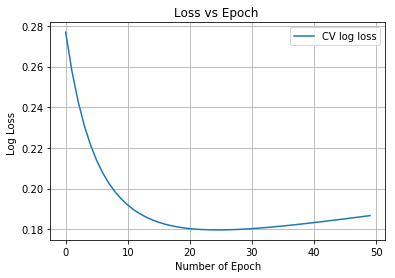

In [55]:
x = np.array([i for i in range(0, 50)])

cv_log_loss_arr = np.array(train_loss)

plt.plot(x, cv_log_loss_arr, label = 'CV log loss')

plt.legend(loc="upper right")
plt.grid()

plt.xlabel('Number of Epoch')
plt.ylabel('Log Loss ')

plt.title('Loss vs Epoch ')
plt.show()


If any one wants to try other calibration algorithm istonic regression also please check these tutorials

1. http://fa.bianp.net/blog/tag/scikit-learn.html#fn:1

2. https://drive.google.com/open?id=1MzmA7QaP58RDzocB0RBmRiWfl7Co_VJ7

3. https://drive.google.com/open?id=133odBinMOIVb_rh_GQxxsyMRyW-Zts7a

4. https://stat.fandom.com/wiki/Isotonic_regression#Pool_Adjacent_Violators_Algorithm
